<a href="https://www.kaggle.com/code/mikedelong/cluster-ice-cream-by-ingredients?scriptVersionId=135435675" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd 

filename = '../input/ice-cream-dataset/combined/products.csv'
full_columns = ['brand', 'key', 'name', 'subhead', 'description', 'rating', 'rating_count', 'ingredients']
usecols = ['brand', 'key', 'name', 'ingredients']
df = pd.read_csv(filepath_or_buffer=filename, usecols=usecols, )
df.head()

,brand,key,name,ingredients
0,bj,0_bj,Salted Caramel Core,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
1,bj,1_bj,Netflix & Chilll'd™,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
2,bj,2_bj,Chip Happens,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
3,bj,3_bj,Cannoli,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
4,bj,4_bj,Gimme S’more!™,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."


In [2]:
from re import sub
t0_columns = ['key', 'brand', 'name', 'ingredients']
t0_df = df[t0_columns].copy(deep=True)
t0_df['long name'] = t0_df.apply(func=lambda x: ' '.join([x['brand'], x['name']]), axis=1)
# remove ingredient sublists that are in parentheses
t0_df['short'] = t0_df['ingredients'].apply(func=lambda x: sub(r'\([^)]*\)', '', x).lower())
t0_df['list'] = t0_df['short'].str.split(',')
t0_df['list'] = t0_df['list'].apply(func=lambda x: [item.replace('and/or', ' ').replace(':', ' ').strip() for item in x])
t0_df.head()

,key,brand,name,ingredients,long name,short,list
0,0_bj,bj,Salted Caramel Core,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",bj Salted Caramel Core,"cream, skim milk, liquid sugar , water, brown ...","[cream, skim milk, liquid sugar, water, brown ..."
1,1_bj,bj,Netflix & Chilll'd™,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",bj Netflix & Chilll'd™,"cream, skim milk, liquid sugar , water, sugar,...","[cream, skim milk, liquid sugar, water, sugar,..."
2,2_bj,bj,Chip Happens,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,...",bj Chip Happens,"cream, liquid sugar , skim milk, water, sugar,...","[cream, liquid sugar, skim milk, water, sugar,..."
3,3_bj,bj,Cannoli,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",bj Cannoli,"cream, skim milk, liquid sugar , water, corn ...","[cream, skim milk, liquid sugar, water, corn s..."
4,4_bj,bj,Gimme S’more!™,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ...",bj Gimme S’more!™,"cream, skim milk, water, liquid sugar , sugar,...","[cream, skim milk, water, liquid sugar, sugar,..."


In [3]:
# get the dummies for the ingredients
t1_df = pd.concat([t0_df, pd.get_dummies(t0_df['list'].explode()).groupby(level=0).sum()], axis=1)
t1_df.head()

,key,brand,name,ingredients,long name,short,list,acesulfame potassium,almond extract,almond milk,...,whole milk powder,whole wheat graham flour,whole wheat/graham flour,wine,xanthan gum,yeast extract,yellow 5,yellow 5 lake,yellow 6,yellow 6 lake
0,0_bj,bj,Salted Caramel Core,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",bj Salted Caramel Core,"cream, skim milk, liquid sugar , water, brown ...","[cream, skim milk, liquid sugar, water, brown ...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1_bj,bj,Netflix & Chilll'd™,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",bj Netflix & Chilll'd™,"cream, skim milk, liquid sugar , water, sugar,...","[cream, skim milk, liquid sugar, water, sugar,...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2_bj,bj,Chip Happens,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,...",bj Chip Happens,"cream, liquid sugar , skim milk, water, sugar,...","[cream, liquid sugar, skim milk, water, sugar,...",0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3_bj,bj,Cannoli,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),...",bj Cannoli,"cream, skim milk, liquid sugar , water, corn ...","[cream, skim milk, liquid sugar, water, corn s...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4_bj,bj,Gimme S’more!™,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ...",bj Gimme S’more!™,"cream, skim milk, water, liquid sugar , sugar,...","[cream, skim milk, water, liquid sugar, sugar,...",0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# drop ingredients that only appear once
counts = t1_df.drop(columns=['brand', 'ingredients', 'key', 'list', 'long name', 'name', 'short']).sum().to_dict()
t1_df = t1_df.drop(columns=[key for key, value in counts.items() if value == 1])
t1_df = t1_df.sample(frac=1, random_state=1).reset_index(drop=True)
t1_df.head()

,key,brand,name,ingredients,long name,short,list,acesulfame potassium,almond milk,almonds,...,whey protein concentrate,whiskey,white chocolate ice cream,whole egg and egg yolk,whole milk powder,whole wheat graham flour,whole wheat/graham flour,xanthan gum,yellow 5 lake,yellow 6 lake
0,10_hd,hd,Chocolate Soft Dipped Ice Cream Bar,"CHOCOLATE ICE CREAM: CREAM, SKIM MILK, SUGAR, ...",hd Chocolate Soft Dipped Ice Cream Bar,"chocolate ice cream: cream, skim milk, sugar, ...","[chocolate ice cream cream, skim milk, sugar,...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,68_breyers,breyers,Layered Dessert Brownie Cheesecake,"MILK, CORN SYRUP, SUGAR, ENRICHED WHEAT FLOUR,...",breyers Layered Dessert Brownie Cheesecake,"milk, corn syrup, sugar, enriched wheat flour,...","[milk, corn syrup, sugar, enriched wheat flour...",0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33_breyers,breyers,CarbSmart™ Almond Bar,"MILK, COCONUT OIL, WATER, MALTITOL SYRUP, SUGA...",breyers CarbSmart™ Almond Bar,"milk, coconut oil, water, maltitol syrup, suga...","[milk, coconut oil, water, maltitol syrup, sug...",1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,65_hd,hd,Vanilla Milk Chocolate Ice Cream Bar,"CREAM, SKIM MILK, SUGAR, EGG YOLKS, VANILLA EX...",hd Vanilla Milk Chocolate Ice Cream Bar,"cream, skim milk, sugar, egg yolks, vanilla ex...","[cream, skim milk, sugar, egg yolks, vanilla e...",0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,32_hd,hd,Irish Cream Cookie Squares,"CREAM, SKIM MILK, SUGAR, CORN SYRUP, EGG YOLKS...",hd Irish Cream Cookie Squares,"cream, skim milk, sugar, corn syrup, egg yolks...","[cream, skim milk, sugar, corn syrup, egg yolk...",0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# build t-SNE clusters based on ingredients
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=1)
tsne_drop_columns = ['brand', 'ingredients', 'key', 'list', 'long name', 'name', 'short']
tsne_results = tsne.fit_transform(X=t1_df.drop(columns=tsne_drop_columns).values)
tsne_plot_df = pd.DataFrame(data={'brand': t1_df['brand'],'name': t1_df['name'], 'x': tsne_results[:, 0], 'y': tsne_results[:, 1]})
tsne_plot_df.head()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 241 samples in 0.000s...
[t-SNE] Computed neighbors for 241 samples in 0.046s...
[t-SNE] Computed conditional probabilities for sample 241 / 241
[t-SNE] Mean sigma: 1.671249
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.392246
[t-SNE] KL divergence after 1000 iterations: 0.435263


,brand,name,x,y
0,hd,Chocolate Soft Dipped Ice Cream Bar,1.960916,-2.879655
1,breyers,Layered Dessert Brownie Cheesecake,15.040442,-8.764645
2,breyers,CarbSmart™ Almond Bar,11.903073,-15.028451
3,hd,Vanilla Milk Chocolate Ice Cream Bar,-8.034277,-1.193726
4,hd,Irish Cream Cookie Squares,-11.260779,0.210966


<Axes: xlabel='x', ylabel='y'>

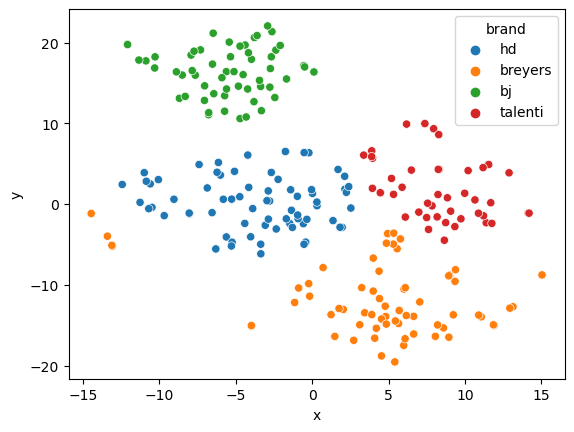

In [6]:
# plot the clusters
%matplotlib inline
from seaborn import scatterplot
scatterplot(data=tsne_plot_df, x='x', y='y', hue='brand')

Crazy how t-SNE finds the brand clusters based on the ingredients. Let's build some classifiers and see how they do.

In [7]:
from sklearn.model_selection import train_test_split

random_state = 1
test_size = 0.25
x_train, x_test, y_train, y_test = train_test_split(t1_df.drop(columns=['ingredients', 'key', 'list', 'long name', 'name', 'short', 'brand']).values, t1_df['brand'].values,  random_state = random_state, shuffle=True, test_size = test_size, )

In [8]:
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

long_results = False
random_state = 1
for model_name, model in {
    'decision tree classifer' : DecisionTreeClassifier(random_state=random_state, ),
    'dummy / most frequent' : DummyClassifier(strategy='most_frequent', random_state=random_state, ),
    'dummy / prior' : DummyClassifier(strategy='prior', random_state=random_state, ),
    'dummy / stratified' : DummyClassifier(strategy='stratified', random_state=random_state, ),
    'dummy / uniform' : DummyClassifier(strategy='uniform', random_state=random_state, ),
    'extra trees' : ExtraTreesClassifier(n_estimators=100, random_state=random_state, verbose=0, ),
    'logistic regression': LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=random_state, verbose=0, ),
    'k nearest neigbors (k=8)': KNeighborsClassifier(n_neighbors=8, ),
    'k nearest neigbors (k=16)': KNeighborsClassifier(n_neighbors=16, ),
    'k nearest neigbors (k=32)': KNeighborsClassifier(n_neighbors=32, ),
    'naive Bayes' : GaussianNB(),
    'support vector' : LinearSVC(max_iter=2000, random_state=random_state, verbose=0, ),
}.items():
    model.fit(X=x_train, y=y_train)

    y_pred = model.predict(X=x_test)
    if long_results:
        print('classifier: {}'.format(model_name))
        print(classification_report(y_true=y_test, y_pred=y_pred))
        print(confusion_matrix(y_true=y_test, y_pred=y_pred))
        print('f1 is {:6.3f}'.format(f1_score(average='micro', y_true=y_test, y_pred=y_pred)))
    else:
        print('f1 / model: {:6.3f} / {}'.format(f1_score(average='micro', y_true=y_test, y_pred=y_pred), model_name))

f1 / model:  1.000 / decision tree classifer
f1 / model:  0.230 / dummy / most frequent
f1 / model:  0.230 / dummy / prior
f1 / model:  0.213 / dummy / stratified
f1 / model:  0.295 / dummy / uniform
f1 / model:  1.000 / extra trees
f1 / model:  1.000 / logistic regression
f1 / model:  0.951 / k nearest neigbors (k=8)
f1 / model:  0.934 / k nearest neigbors (k=16)
f1 / model:  0.836 / k nearest neigbors (k=32)
f1 / model:  0.984 / naive Bayes
f1 / model:  1.000 / support vector


Turns out they do badly if we use the ingredients directly. Let's try some dimension reduction.

In [9]:
from sklearn.decomposition import PCA
pca = PCA(copy=True, n_components=5, random_state=1, )
pca_drop_columns = ['brand', 'ingredients', 'key', 'list', 'long name', 'name', 'short']
pca_model_results = pca.fit_transform(X=t1_df.drop(columns=pca_drop_columns).values, )
pca_plot_df = pd.DataFrame(data={'brand': t1_df['brand'], '0': pca_model_results[:, 0], '1': pca_model_results[:, 1], 
                                '2': pca_model_results[:, 2], '3': pca_model_results[:, 3]})
pca_plot_df.head()

,brand,0,1,2,3
0,hd,-1.634308,0.132511,1.123115,-0.397944
1,breyers,6.452411,1.831524,-1.451095,-0.271617
2,breyers,-0.142430,2.053294,-0.907201,0.411479
3,hd,-0.240181,-0.759056,2.164332,0.808526
4,hd,4.346393,-1.886820,2.175774,0.466602


<Axes: xlabel='0', ylabel='1'>

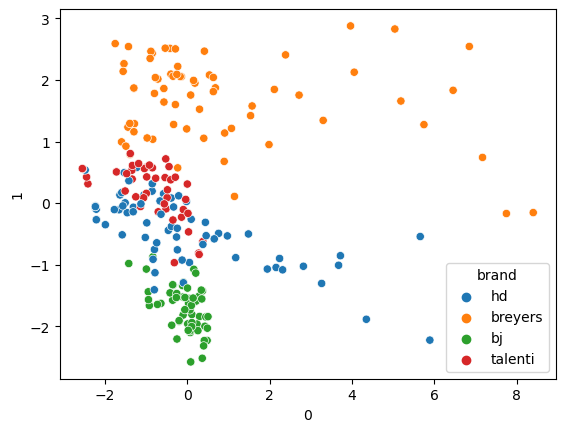

In [10]:
scatterplot(data=pca_plot_df, x='0', y='1', hue='brand')

In [11]:
random_state = 1
test_size = 0.25
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(pca_plot_df.drop(columns=['brand']).values, pca_plot_df['brand'].values, random_state=random_state, shuffle=True, test_size=test_size, )

In [12]:
for model_name, model in {
    'decision tree classifer' : DecisionTreeClassifier(random_state=random_state, ),
    'extra trees' : ExtraTreesClassifier(n_estimators=100, random_state=random_state, verbose=0, ),
    'logistic regression': LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=random_state, verbose=0, ),
    'k nearest neigbors (k=8)': KNeighborsClassifier(n_neighbors=8, ),
    'k nearest neigbors (k=16)': KNeighborsClassifier(n_neighbors=16, ),
    'k nearest neigbors (k=32)': KNeighborsClassifier(n_neighbors=32, ),
    'naive Bayes' : GaussianNB(),
    'support vector' : LinearSVC(max_iter=10000, random_state=random_state, verbose=0, ),
}.items():
    model.fit(X=x_train_pca, y=y_train_pca)

    y_pred_pca = model.predict(X=x_test_pca)
    if long_results:
        print('classifier: {}'.format(model_name))
        print(classification_report(y_true=y_test_pca, y_pred=y_pred_pca))
        print(confusion_matrix(y_true=y_test_pca, y_pred=y_pred_pca))
        print('f1 is {:6.3f}'.format(f1_score(average='micro', y_true=y_test_pca, y_pred=y_pred_pca)))
    else:
        print('f1 / model: {:6.3f} / {}'.format(f1_score(average='micro', y_true=y_test_pca, y_pred=y_pred_pca), model_name))

f1 / model:  0.836 / decision tree classifer
f1 / model:  0.951 / extra trees
f1 / model:  0.918 / logistic regression
f1 / model:  0.918 / k nearest neigbors (k=8)
f1 / model:  0.852 / k nearest neigbors (k=16)
f1 / model:  0.787 / k nearest neigbors (k=32)
f1 / model:  0.885 / naive Bayes
f1 / model:  0.934 / support vector


Finding more PCA components and including them in our models generally improves f1.

In [13]:
random_state = 1
test_size = 0.25
x_train_tsne, x_test_tsne, y_train_tsne, y_test_tsne = train_test_split(tsne_plot_df.drop(columns=['brand', 'name']).values, tsne_plot_df['brand'].values, random_state=random_state, shuffle=True, test_size=test_size, )

In [14]:
long_results = False
for model_name, model in {
    'decision tree classifer' : DecisionTreeClassifier(random_state=random_state, ),
    'extra trees' : ExtraTreesClassifier(n_estimators=100, random_state=random_state, verbose=0, ),
    'logistic regression': LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=random_state, verbose=0, ),
    'k nearest neigbors (k=8)': KNeighborsClassifier(n_neighbors=8, ),
    'k nearest neigbors (k=16)': KNeighborsClassifier(n_neighbors=16, ),
    'k nearest neigbors (k=32)': KNeighborsClassifier(n_neighbors=32, ),
    'naive Bayes' : GaussianNB(),
    'support vector' : LinearSVC(max_iter=100000, random_state=random_state, verbose=0, ),
}.items():
    model.fit(X=x_train_tsne, y=y_train_tsne)

    y_pred_tsne = model.predict(X=x_test_tsne)
    if long_results:
        print('classifier: {}'.format(model_name))
        print(classification_report(y_true=y_test_tsne, y_pred=y_pred_tsne))
        print(confusion_matrix(y_true=y_test_tsne, y_pred=y_pred_tsne))
        print('f1 is {:6.3f}'.format(f1_score(average='micro', y_true=y_test_tsne, y_pred=y_pred_tsne)))
    else:
        print('f1 / model: {:6.3f} / {}'.format(f1_score(average='micro', y_true=y_test_tsne, y_pred=y_pred_tsne), model_name))

f1 / model:  0.984 / decision tree classifer
f1 / model:  1.000 / extra trees
f1 / model:  0.951 / logistic regression
f1 / model:  0.967 / k nearest neigbors (k=8)
f1 / model:  0.967 / k nearest neigbors (k=16)
f1 / model:  0.967 / k nearest neigbors (k=32)
f1 / model:  0.984 / naive Bayes
f1 / model:  0.967 / support vector


Amazing. These results are so good it's hard not to be suspicious.